In [2]:
import numpy as np
import pandas as pd

# Loading the data

In [16]:
df = pd.read_csv("C:\\Users\\vineet.soni\\Downloads\\DE Assignment (2)\\DE Assignment (2)\\DE Assignment\\data_enginner_assignment.csv")

In [4]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."


# Rating Bins:
Using the column "average_review_rating," create five bins for ratings: 0-1, 1-2, 2-3, 3-4, 4-5.
Save the results in amazon_rating_processed.csv with columns unique_id,  rating and rating_bin.

In [66]:
import pandas as pd

df = pd.read_csv("C:\\Users\\vineet.soni\\Downloads\\DE Assignment (2)\\DE Assignment (2)\\DE Assignment\\data_enginner_assignment.csv")

df['average_review_rating'] = df['average_review_rating'].str.replace(' out of 5 stars', '', regex=False).astype(float)

bins = [0, 1, 2, 3, 4, 5.1] 
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df['rating_bin'] = pd.cut(df['average_review_rating'], bins=bins, labels=labels, right=True)
amazon_rating = df[['uniq_id', 'average_review_rating', 'rating_bin']]

amazon_rating.to_csv('amazon_rating.csv',index=False)
print("The amazon_rating.csv' file has been successfully created.")

The amazon_rating.csv' file has been successfully created.


In [67]:
df = pd.read_csv("amazon_rating.csv")
df.head()

,uniq_id,average_review_rating,rating_bin
0,eac7efa5dbd3d667f26eb3d3ab504464,4.9,4-5
1,b17540ef7e86e461d37f3ae58b7b72ac,4.5,4-5
2,348f344247b0c1a935b1223072ef9d8a,3.9,3-4
3,e12b92dbb8eaee78b22965d2a9bbbd9f,5.0,4-5
4,e33a9adeed5f36840ccc227db4682a36,4.7,4-5


# Visualisation

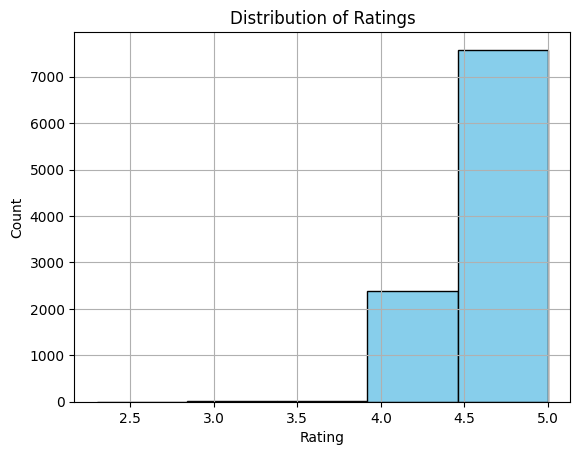

In [63]:
import matplotlib.pyplot as plt

amazon_rating['average_review_rating'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.grid(True)

plt.show()

# Category and Subcategory:
Using the column "amazon_category_and_sub_category," extract the category and subcategory.
The first part before ">" is the category, and the last part after the last ">" is the subcategory.
Save the results in amazon_cat_subcat_processed.csv with columns unique_id, category, and subcategory.

In [26]:
df['amazon_category_and_sub_category'].head()

0    Hobbies > Model Trains & Railway Sets > Rail V...
1    Hobbies > Model Trains & Railway Sets > Rail V...
2    Hobbies > Model Trains & Railway Sets > Rail V...
3    Hobbies > Model Trains & Railway Sets > Rail V...
4    Hobbies > Model Trains & Railway Sets > Rail V...
Name: amazon_category_and_sub_category, dtype: object

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\vineet.soni\\Downloads\\DE Assignment (2)\\DE Assignment (2)\\DE Assignment\\data_enginner_assignment.csv")

# Drop rows with any missing values in the relevant column to ensure clean extraction
df_cleaned = df.dropna(subset=['amazon_category_and_sub_category', 'uniq_id']).copy()

# Extract the category, which is the part before the first '>'
df_cleaned.loc[:, 'category'] = df_cleaned['amazon_category_and_sub_category'].str.split('>', n=1).str[0].str.strip()

# Extract the subcategory, which is the part after the last '>'
df_cleaned.loc[:, 'subcategory'] = df_cleaned['amazon_category_and_sub_category'].str.rsplit('>', n=1).str[-1].str.strip()

# Create a new DataFrame with the required columns
amazon_cat_subcat_processed = df_cleaned[['uniq_id', 'category', 'subcategory']]

# Rename the 'uniq_id' column to 'unique_id' as requested
amazon_cat_subcat_processed = amazon_cat_subcat_processed.rename(columns={'uniq_id': 'unique_id'})

# Save the processed DataFrame to a new CSV file
amazon_cat_subcat_processed.to_csv('amazon_cat_subcat_processed.csv', index=False)

print("The 'amazon_cat_subcat_processed.csv' file has been successfully created.")

The 'amazon_cat_subcat_processed.csv' file has been successfully created.


# Pie chart representation of category and sub-category

In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("amazon_cat_subcat_processed.csv")
df['category'].unique()

array(['Hobbies', 'Characters & Brands', 'Fancy Dress', 'Bags',
       'Arts & Crafts', 'Handbags & Shoulder Bags', 'Games',
       'Figures & Playsets', 'Home Accessories',
       'Sweets, Chocolate & Gum', 'Sports Toys & Outdoor',
       'Die-Cast & Toy Vehicles', 'Baby & Toddler Toys',
       'Storage, Cleaning & Ring Sizers', 'Bedding & Linens',
       'Office Supplies', 'Party Supplies', 'Camping & Hiking',
       'Pretend Play', 'Women', 'Electronic Toys', 'Car Parts',
       'Dolls & Accessories', 'Indoor Lighting', 'Educational Toys',
       'Laundry, Storage & Organisation', "Supporters' Gear",
       'Jams, Honey & Spreads', 'Novelty & Special Use',
       'Musical Toy Instruments', 'Men', 'Sex & Sensuality',
       'Cooking & Dining', 'Medication & Remedies',
       'Puppets & Puppet Theatres', 'Jigsaws & Puzzles', 'Dogs',
       'Medical Supplies & Equipment', 'Pens, Pencils & Writing Supplies',
       'Worlds Apart', 'Gardening', 'Lab & Scientific Products',
       'Novelt

In [16]:
df['subcategory'].unique()

array(['Trains', 'Lamps & Lighting', 'Locomotives', 'Signal & Sound',
       'Recreational Activities', 'Transformers & Decoders',
       'Wooden Thomas', 'Control Moduls', 'Landscaping',
       'Motor Road & Rail', 'Hasbro', 'Toys', 'Costumes', 'Bags',
       "Children's Craft Kits", 'Tomy', "Kids'", 'Dice & Dice Games',
       'Board Games', 'Art Sand', 'Felt Kits', 'Farm & Animals', 'Barbie',
       'Window Stickers', 'Glitter', 'Pirates',
       'Science Fiction & Fantasy', 'Knights & Castles', 'Chocolate',
       'Beach Toys', 'Vehicles', 'Boats', 'Pushchair Toys', 'Figures',
       'Action Man', 'Collectible Figures & Accessories',
       'Collectible Props & Memorabilia', 'Bobbleheads & Busts',
       'Rockets & Spaceships', 'Accessories',
       'Bead Art & Jewellery-Making', "Children's Chalk", 'Blackboards',
       'Boxes & Organisers', 'Flat Sheets', 'Crayola', 'Paper & Stickers',
       'Painting By Numbers', 'Early Learning Centre',
       'Labels & Stickers', 'Model Build

In [17]:
df['category'].value_counts()

category
Hobbies                             1464
Die-Cast & Toy Vehicles             1221
Figures & Playsets                  1111
Characters & Brands                  960
Games                                941
Arts & Crafts                        802
Party Supplies                       694
Fancy Dress                          585
Sports Toys & Outdoor                372
Dolls & Accessories                  371
Jigsaws & Puzzles                    274
Puppets & Puppet Theatres            269
Baby & Toddler Toys                  106
Pretend Play                          45
Musical Toy Instruments               19
Novelty & Special Use                 11
Pens, Pencils & Writing Supplies       7
Office Supplies                        6
Home Accessories                       5
Electronic Toys                        5
Cooking & Dining                       4
Bags                                   4
Worlds Apart                           3
Gardening                              3
Women  

In [18]:
df['subcategory'].value_counts()

subcategory
Vehicles                                881
Toys                                    623
Science Fiction & Fantasy               485
Bead Art & Jewellery-Making             368
Packs & Sets                            317
                                       ... 
Glass Markers & Charms                    1
Children's Knitting & Textile Design      1
Bead Charms                               1
Travel & Pocket Games                     1
Drinking Games                            1
Name: count, Length: 235, dtype: int64

In [30]:
import pandas as pd
import plotly.express as px

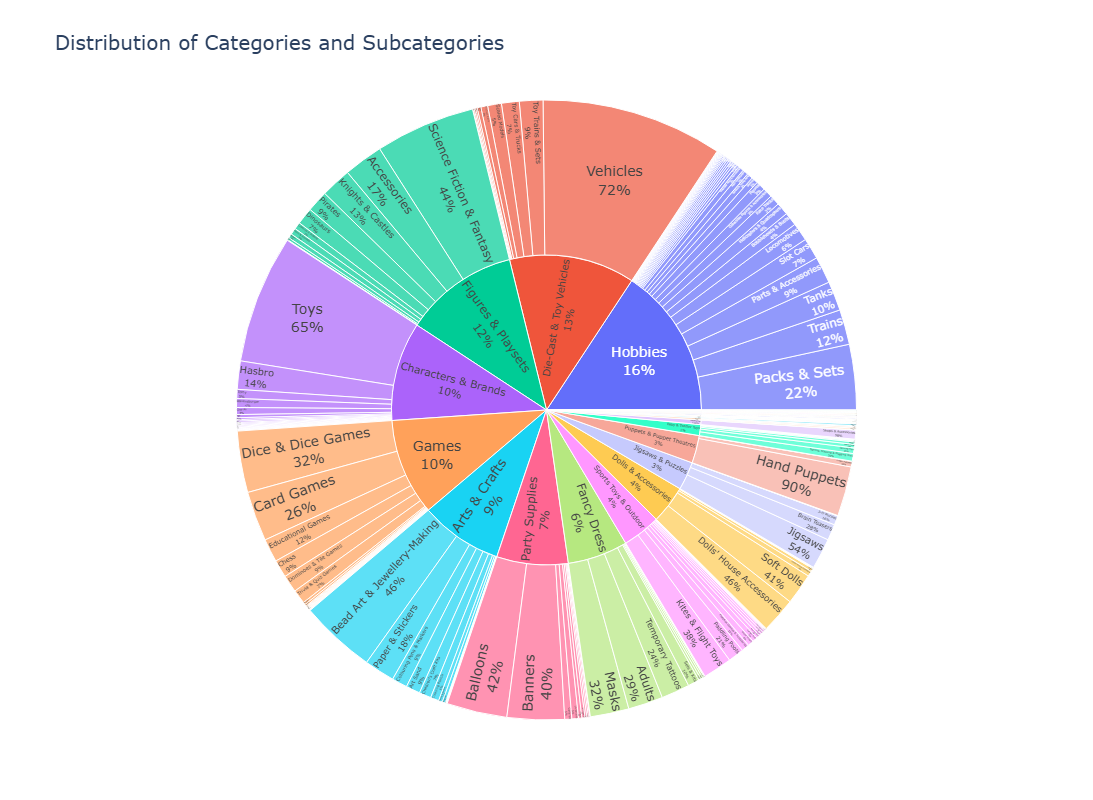

In [51]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("amazon_cat_subcat_processed.csv")

fig = px.sunburst(df,
                  path=['category', 'subcategory'],
                  title='Distribution of Categories and Subcategories')

fig.update_layout(
    font=dict(size=14),
    width=800,  
    height=800  
)

fig.update_traces(textinfo="label+percent parent")

fig.show()

In [50]:
# import plotly.express as px
# import pandas as pd

# df = pd.read_csv("amazon_cat_subcat_processed.csv")

# fig = px.sunburst(df , path = ['category','subcategory'])

# fig.update_layout(title_text='Distribution of Category and Subcategory',
#                  width=800,  
#                  height=800)
# fig.update_traces(textinfo="label+percent parent") # Show label and percentage of parent
# fig.show()

# Customer Questions and Answers:
Using the column "customer_questions_and_answers," extract the questions and answers.
Questions are separated by "|", and answers are separated by "//".
Save the results in amazon_qna_processed.csv with columns unique_id, question, and answers

In [25]:
df['customer_questions_and_answers'].head(2)

0    Does this catalogue detail all the previous Ho...
1    can you turn off sounds // hi no you cant turn...
Name: customer_questions_and_answers, dtype: object

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\vineet.soni\\Downloads\\DE Assignment (2)\\DE Assignment (2)\\DE Assignment\\data_enginner_assignment.csv")

# Select the relevant columns and fill any NaN values in the 'customer_questions_and_answers' column with an empty string
qna_df = df[['uniq_id', 'customer_questions_and_answers']].copy()
qna_df['customer_questions_and_answers'] = qna_df['customer_questions_and_answers'].fillna('')

# Split the column by '|' to separate each question-answer pair and explode the list into separate rows
qna_df['qna_pair'] = qna_df['customer_questions_and_answers'].str.split('|')
qna_df = qna_df.explode('qna_pair')

# Drop rows where the qna_pair is empty after splitting
qna_df = qna_df[qna_df['qna_pair'].str.strip() != '']

# Use rsplit to separate the question and answer based on the last '//' delimiter
# .str[0] gets the question and .str[1] gets the answer
qna_df['question'] = qna_df['qna_pair'].str.rsplit('//', n=1).str[0].str.strip()
qna_df['answers'] = qna_df['qna_pair'].str.rsplit('//', n=1).str[1].str.strip()

# Select the required columns and rename 'uniq_id' to 'unique_id'
final_df = qna_df[['uniq_id', 'question', 'answers']].rename(columns={'uniq_id': 'unique_id'})

# Remove any remaining rows where the 'question' or 'answers' are still NaN
final_df = final_df.dropna(subset=['question', 'answers'])

# Save the processed DataFrame to a new CSV file
final_df.to_csv('amazon_qna_processed.csv', index=False)

print("The 'amazon_qna_processed.csv' file has been successfully created with columns unique_id, question, and answers.")

The 'amazon_qna_processed.csv' file has been successfully created with columns unique_id, question, and answers.


# Sellers:
Using the column "sellers," list all sellers for each product.
If a product has multiple sellers, list each seller.
Save the results in amazon_seller_listing_processed.csv with columns unique_id and sellerName

In [24]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\vineet.soni\\Downloads\\DE Assignment (2)\\DE Assignment (2)\\DE Assignment\\data_enginner_assignment.csv")

# Initializing a list to hold the processed data
seller_data = []

for index, row in df.iterrows():
    unique_id = row['uniq_id']
    sellers_str = row['sellers']

    # Skip rows with missing seller data
    if pd.isna(sellers_str):
        continue

    
    # Check if the string contains multiple sellers or a single one.
    if '}, {' in sellers_str:
        seller_list_str = sellers_str.split('}, {')
    else:
        # Single seller or malformed string, treat it as a single item list.
        seller_list_str = [sellers_str]

    for seller_item_str in seller_list_str:
        parts = seller_item_str.split('=>')
        if len(parts) > 1:
            seller_name_key = parts[0].strip().replace('{', '').replace('"', '').strip()
            seller_name_value = parts[1].strip().replace('}', '').replace('"', '').replace(']', '').strip()
            
            # Extract the actual seller name and add it to our list
            if seller_name_key.startswith('Seller_name_') and seller_name_value:
                seller_data.append({'unique_id': unique_id, 'sellerName': seller_name_value})

# Create a new DataFrame from the extracted data
amazon_seller_listing_processed = pd.DataFrame(seller_data)

# Save the new DataFrame to a CSV file
amazon_seller_listing_processed.to_csv('amazon_seller_listing_processed.csv', index=False)

print("The 'amazon_seller_listing_processed.csv' file has been successfully created.")

The 'amazon_seller_listing_processed.csv' file has been successfully created.


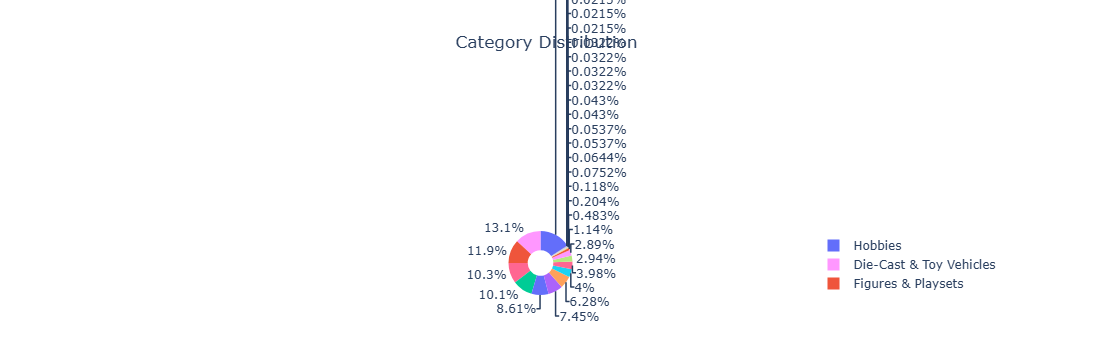

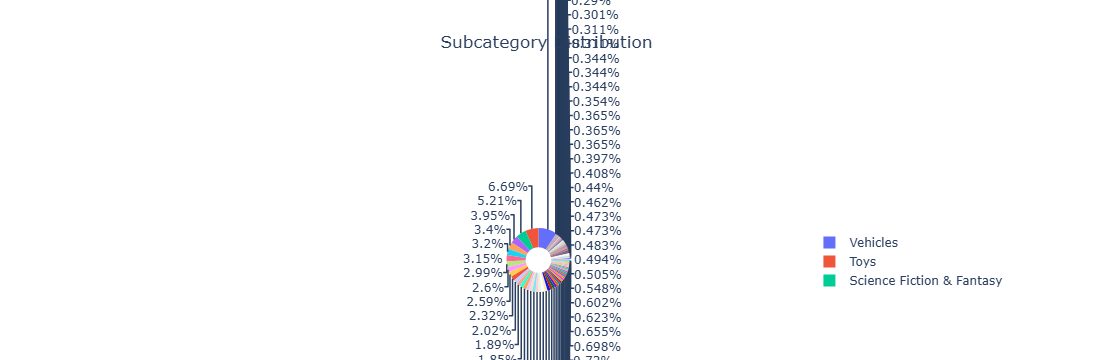

In [29]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

df_user = pd.read_csv("amazon_cat_subcat_processed.csv")


df_category = df_user.groupby('category')['unique_id'].count().reset_index()
df_category = df_category.rename(columns={'unique_id': 'Value'})
df_subcategory = df_user.groupby('subcategory')['unique_id'].count().reset_index()
df_subcategory = df_subcategory.rename(columns={'unique_id': 'Value'})


colors = px.colors.qualitative.Plotly
category_colors = colors[:len(df_category)]
subcategory_colors = colors[:len(df_subcategory)]


fig_category = go.Figure(go.Pie(
    labels=df_category['category'],
    values=df_category['Value'],
    name="Categories",
    hole=0.4,
    marker_colors=category_colors,
    hovertemplate="Category: %{label}<br>Value: %{value}<extra></extra>",
    domain=dict(x=[0, 1], y=[0, 1])
))
fig_category.update_layout(
    title_text='Category Distribution',
    title_x=0.5,
    title_y=0.9
)
fig_category.write_html('category_pie_chart.html')


fig_subcategory = go.Figure(go.Pie(
    labels=df_subcategory['subcategory'],
    values=df_subcategory['Value'],
    name="Subcategories",
    hole=0.4,
    marker_colors=subcategory_colors,
    hovertemplate="Subcategory: %{label}<br>Value: %{value}<extra></extra>",
    domain=dict(x=[0, 1], y=[0, 1])
))
fig_subcategory.update_layout(
    title_text='Subcategory Distribution',
    title_x=0.5,
    title_y=0.9
)
fig_subcategory.write_html('subcategory_pie_chart.html')

fig_category.show()
fig_subcategory.show()